### Kmeans and K-means++

-  The difference between K-Means and K-Means++ primarily lies in how the initial centroids (cluster centers) are selected, which significantly impacts the performance and results of the algorithm.

## Differences between K-Means and K-Means++

| Feature              | **K-Means**                             | **K-Means++**                                      |
|----------------------|-----------------------------------------|---------------------------------------------------|
| **Centroid Initialization** | Random selection of initial centroids  | Initial centroids selected with a probabilistic method that spreads them out |
| **Convergence**       | May converge to a local minimum, depending on the initial centroids | More likely to converge to a global minimum, due to better initial centroid selection |
| **Algorithm Steps**   | 1. Randomly select initial centroids <br> 2. Assign points to the nearest centroid <br> 3. Update centroids based on the mean of assigned points <br> 4. Repeat until centroids stabilize | 1. Select the first centroid randomly <br> 2. Choose subsequent centroids based on distance from existing centroids <br> 3. Assign points and update centroids as in K-Means <br> 4. Repeat until centroids stabilize |
| **Performance**       | Can result in suboptimal clustering due to random initialization | Typically results in better clustering performance and faster convergence |
| **Implementation Complexity** | Simple to implement                     | Slightly more complex due to the initial centroid selection process |



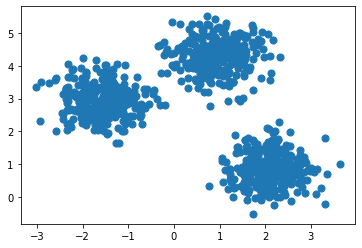

In [1]:
## Random Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate random data with 3 clusters
X, y_true = make_blobs(n_samples=900, centers=3, cluster_std=0.50, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


## K-Means Implementation

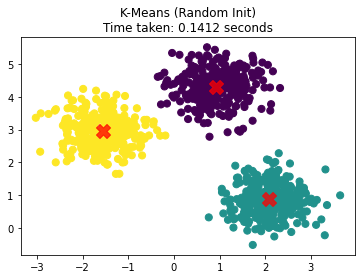

In [2]:
from sklearn.cluster import KMeans
import time

# Standard K-Means
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=0)

start_time = time.time()
kmeans.fit(X)
elapsed_time = time.time() - start_time

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means (Random Init)\nTime taken: {elapsed_time:.4f} seconds')
plt.show()


### K-Means++ Implementation

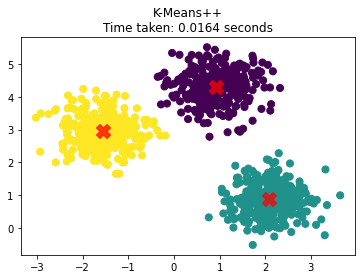

In [3]:
# K-Means++
kmeans_pp = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)

start_time_pp = time.time()
kmeans_pp.fit(X)
elapsed_time_pp = time.time() - start_time_pp

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pp.labels_, s=50, cmap='viridis')
centers_pp = kmeans_pp.cluster_centers_
plt.scatter(centers_pp[:, 0], centers_pp[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means++\nTime taken: {elapsed_time_pp:.4f} seconds')
plt.show()


### By above the performance  and time taken by each method we can say that K-Means++ typically provides better clustering and faster convergence as shown by shorter elapsed time.

- Time Taken: You can observe the time taken for each method, which shows K-Means++ typically being faster and more efficient.
- Clustering Quality: The centroids are better positioned with K-Means++ compared to random initialization in standard K-Means.